# Principal Component Analysis (PCA)

Principal component analysis is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated. This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data

* Non-negative Matrix Factorization (NMF)- For feature Extraction
* t-SNE- For visualization using 2d Scatter plot

The following examplt illustrate the effect of PCA on a synthetic 2d dataset:

In [1]:
import mglearn
from matplotlib import pyplot as plt

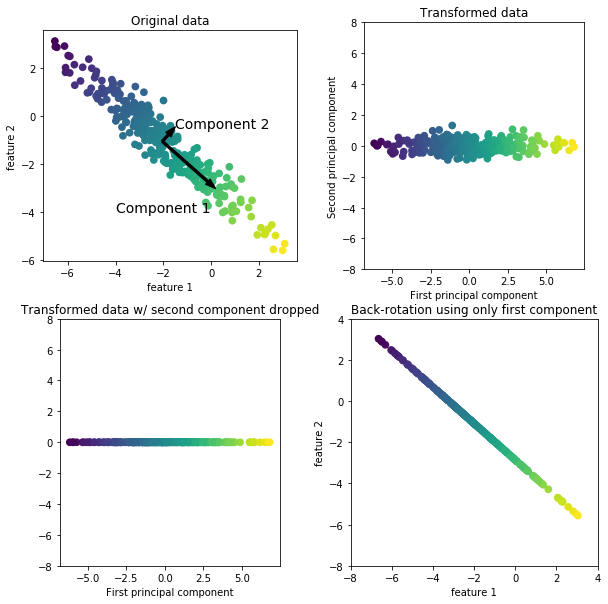

In [2]:
mglearn.plots.plot_pca_illustration()
plt.show()

# Applying PCA to Cancer dataset

In [3]:
from sklearn.datasets import load_breast_cancer
import numpy as np
cancer=load_breast_cancer()

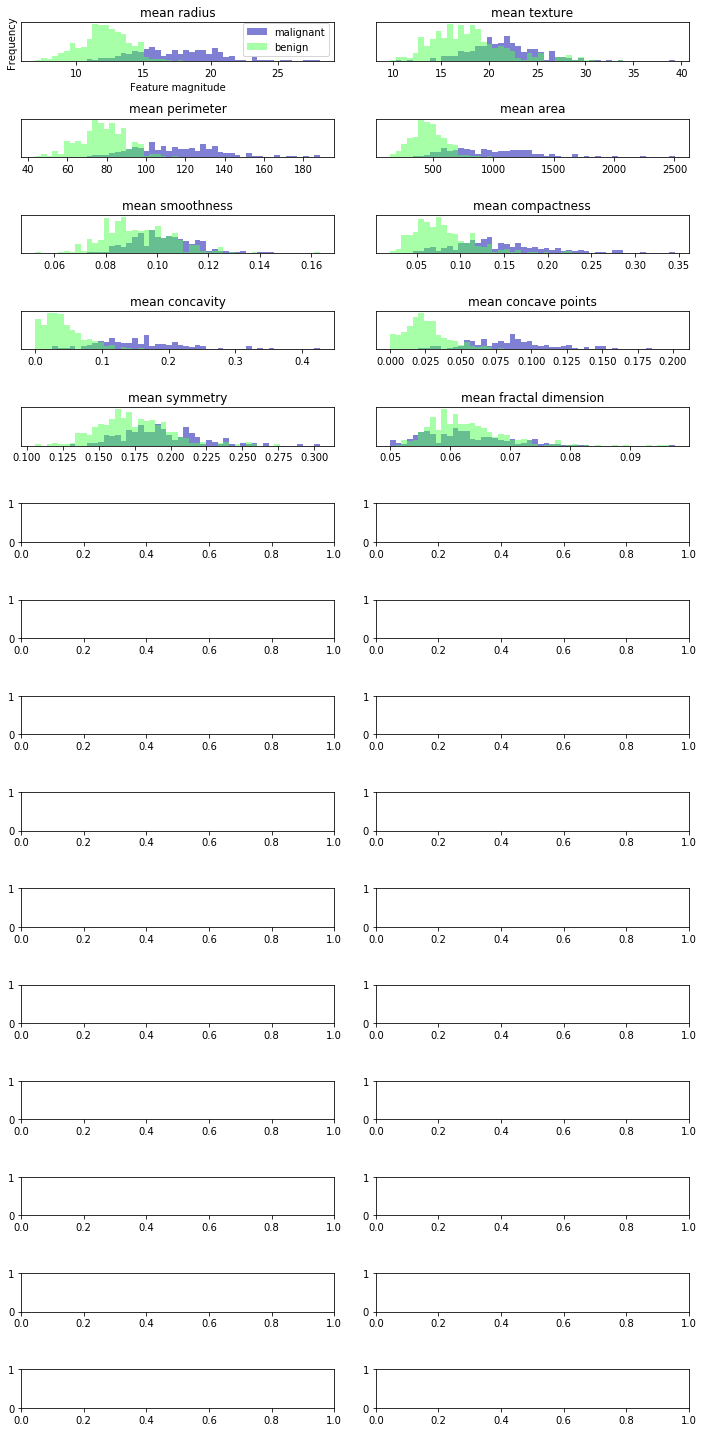

In [4]:
fig,axes=plt.subplots(15,2,figsize=(10,20))
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]

ax=axes.ravel()

for i in range(10):
    _,bins=np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=0.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant","benign"],loc="best")
fig.tight_layout()

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer=load_breast_cancer()
scaler=StandardScaler()
scaler.fit(cancer.data)
X_scaled=scaler.transform(cancer.data)

In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_scaled)

x_pca=pca.transform(X_scaled)
print("Original Shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(x_pca.shape)))

Original Shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

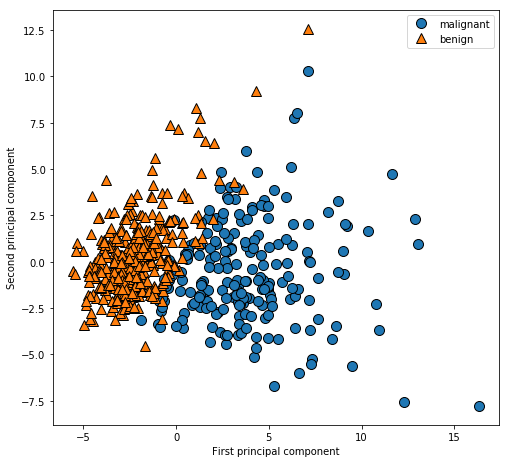

In [7]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1],cancer.target)
plt.legend(cancer.target_names,loc='best')
plt.gca().set_aspect('equal')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [8]:
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components: \n{}".format(pca.components_))

PCA component shape: (2, 30)
PCA components: 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

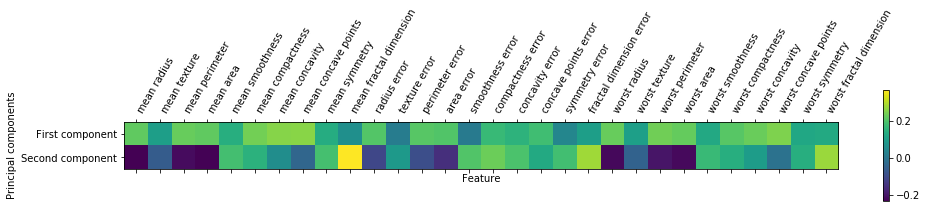

In [9]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['First component','Second component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

# Eigenfaces for feature extraction 

Another application of PCA that we mentioned earlier is feature extraction. The idea behind feature extraction is that it is possible to find a representation of your data that is better suited to analysis than the raw representation you were given. A great example of an application where feature extraction is helpful is with images. Images are made up of pixels, usually stored as red, green, and blue (RGB) intensities. Objects in images are usually made up of thousands of pixels, and only together are they meaningful. We will give a very simple application of feature extraction on images using PCA, by working with face images from the Labeled Faces in the Wild dataset. This dataset contains face images of celebrities downloaded from the Internet, and it includes faces of politicians, singers, actors, and athletes from the early 2000s. We use grayscale versions of these images, and scale them down for faster processing.

c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


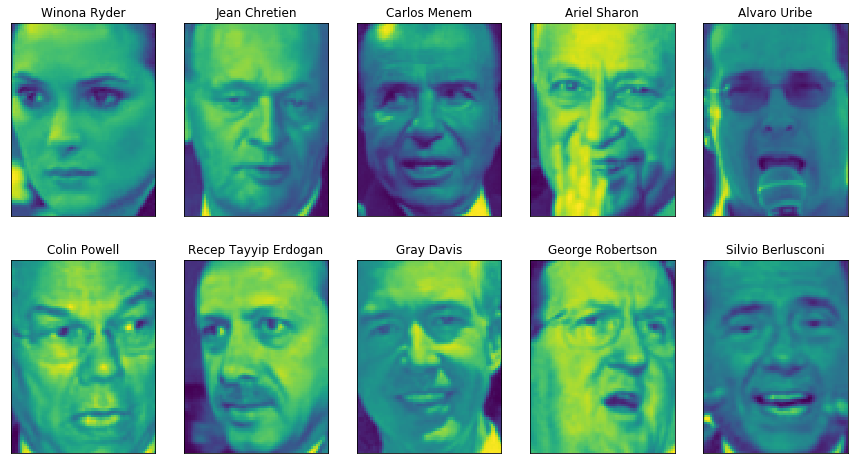

In [10]:
from sklearn.datasets import fetch_lfw_people 
import matplotlib.pyplot as plt
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()}) 
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)    
    ax.set_title(people.target_names[target])
fix.show()

In [11]:
print("peoplt.image.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

peoplt.image.shape: (3023, 87, 65)
Number of classes: 62


The dataset is a bit skewed, however, containing a lot of images of George W. Bush and Colin Powell, as you can see here:


In [12]:
import numpy as np
counts=np.bincount(people.target)
#print count next to target names
for i,(count,name) in enumerate(zip(counts,people.target_names)):
    print("{0:25} {1:3}".format(name,count),end='  ')
    if(i+1)%3==0:
        print()


Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemin                20  John Ashcroft              53

To make the data less skewed, we will only take up to 50 images of each person (otherwise, the feature extraction would be overwhelmed by the likelihood of George W. Bush):


In [13]:
mask=np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1
X_people=people.data[mask]
y_people=people.target[mask]

#scale the grayscale values to be between 0 and 1
X_people/=255

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,stratify=y_people,random_state=-0)

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("Test set score of 1-nn {:.2f}".format(knn.score(X_test,y_test)))

Test set score of 1-nn 0.23


We obtain an accuracy of 26.6%, which is not actually that bad for a 62-class classification problem (random guessing would give you around 1/62 = 1.5% accuracy), but is also not great. We only correctly identify a person every fourth time. This is where PCA comes in. Computing distances in the original pixel space is quite a bad way to measure similarity between faces. When using a pixel representation to compare two images, we compare the grayscale value of each individual pixel to the value of the pixel in the corresponding position in the other image. This representation is quite different from how humans would interpret the image of a face, and it is hard to capture the facial features using this raw representation. For example, using pixel distances means that shifting a face by one pixel to the right corresponds to a drastic change, with a completely different representation. We hope that using distances along principal components can improve our accuracy. Here, we enable the whitening option of PCA, which rescales the principal components to have the same scale. This is the same as using StandardScaler after the transformation. Reusing the data from Figure 3-3 again, whitening corresponds to not only rotating the data, but also rescaling it so that the center panel is a circle instead of an ellipse 

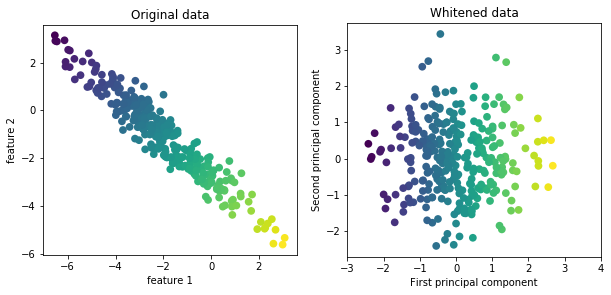

In [15]:
mglearn.plots.plot_pca_whitening()

In [16]:
pca=PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_pc.shape {}".format(X_train_pca.shape))

X_train.shape: (1547, 5655)
X_train_pc.shape (1547, 100)


In [17]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("Test accuracy: {:.2f}".format(knn.score(X_test_pca,y_test)))

Test accuracy: 0.31


Our accuracy improved quite significantly, from 26.6% to 35.7%, confirming our intuition that the principal components might provide a better representation of the data.


In [18]:
# Let's look at the first couplr of principal components
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


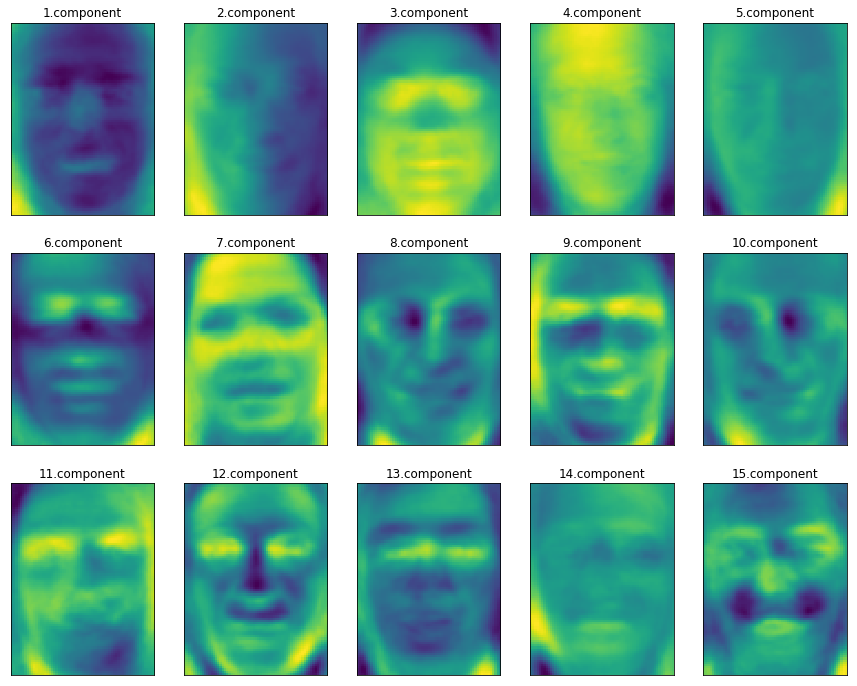

In [19]:
fig,axes=plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks': ()})
for i,(component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}.component".format((i+1)))

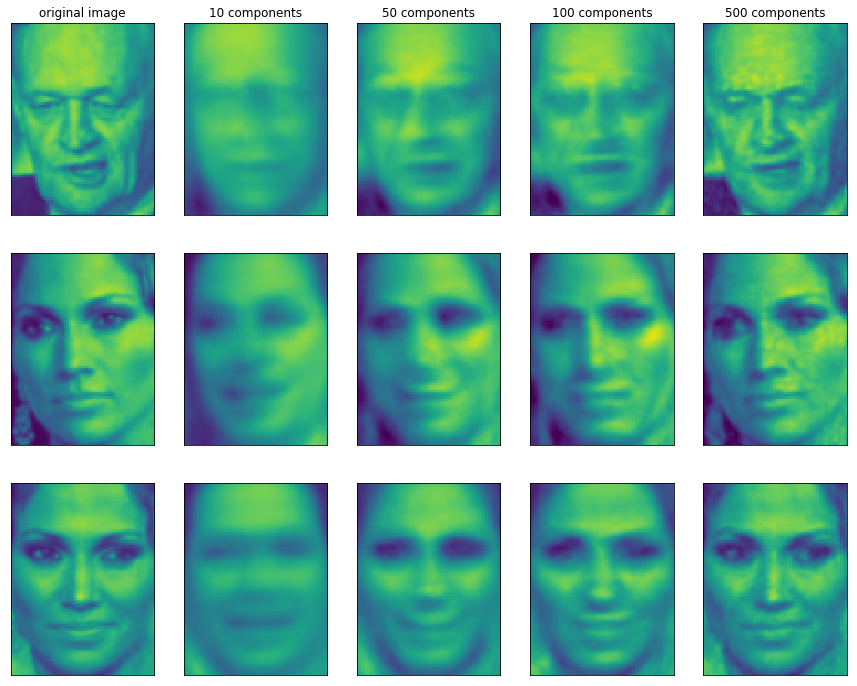

In [20]:
mglearn.plots.plot_pca_faces(X_train,X_test,image_shape)

more principal components, more and more details in the image are preserved.

We can also try to use PCA to visualize all the faces in the dataset in a scatter plot using the first two principal components 

Text(0, 0.5, 'Second principa componenet')

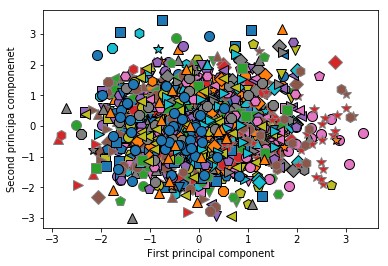

In [21]:
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1],y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principa componenet")

when we use only the first two principal components the whole data is just a big blob, with no separation of classes visible. This is not very surprising, given that even with 10 components, PCA only captures very rough characteristics of the faces.


# Non-Negative Matrix Factorization

Non-negative matrix factorization is another unsupervised learning algorithm that aims to extract useful features. It works similarly to PCA and can also be used for dimensionality reduction. As in PCA, we are trying to write each data point as a weighted sum of some components, as illustrated. 

But whereas in PCA we wanted components that were orthogonal and that explained as much variance of the data as possible, in NMF, we want the components and the coefficients to be nonnegative; that is, we want both the components and the coefficients to be greater than or equal to zero. Consequently, this method can only be applied to data where each feature is non-negative, as a non-negative sum of non-negative components cannot become negative. 

# Applying NMF to Synthetic data

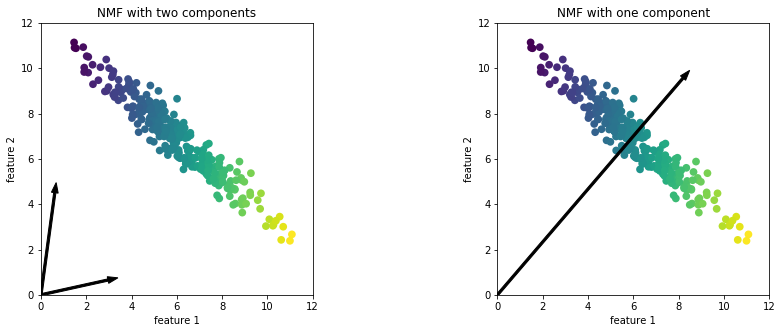

In [22]:
# NMF on 2d sample toy data
mglearn.plots.plot_nmf_illustration()

# Applying NMF to face images

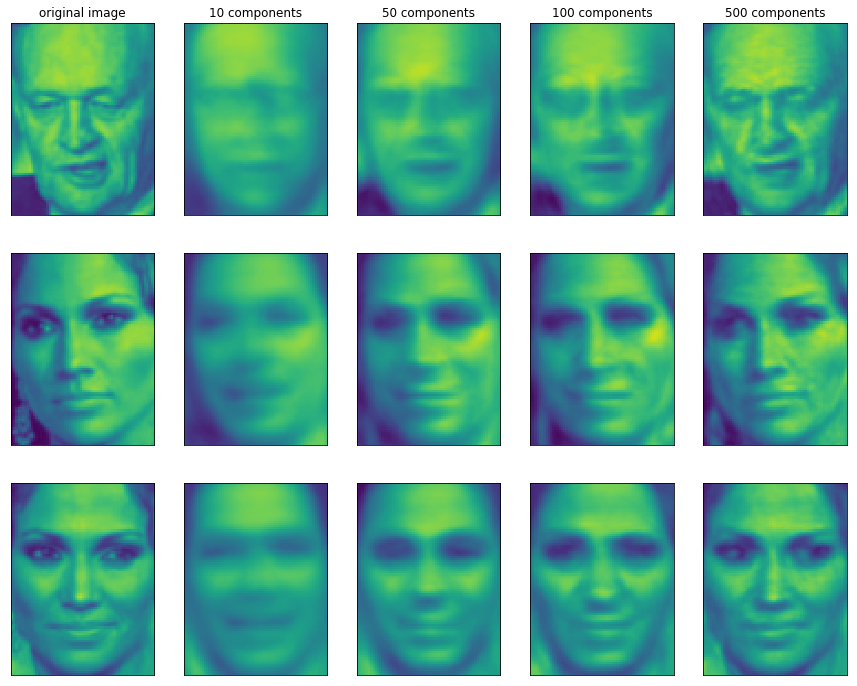

In [23]:
mglearn.plots.plot_nmf_faces(X_train,X_test,image_shape)

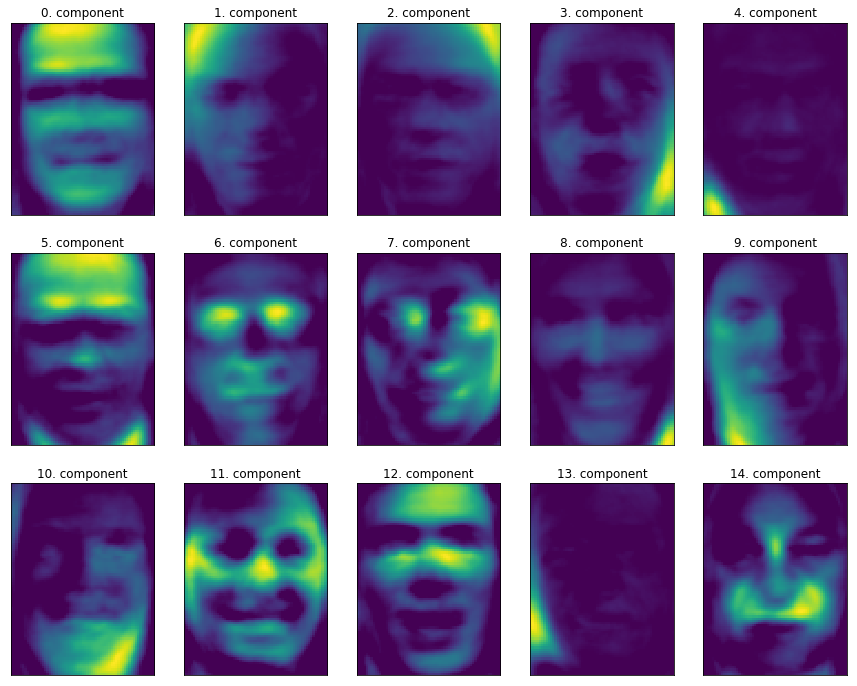

In [24]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=15,random_state=0)
nmf.fit(X_train)
X_train_nmf=nmf.transform(X_train)
X_test_nmf=nmf.transform(X_test)
fig,axes=plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks': (),'yticks':()})
for i,(component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

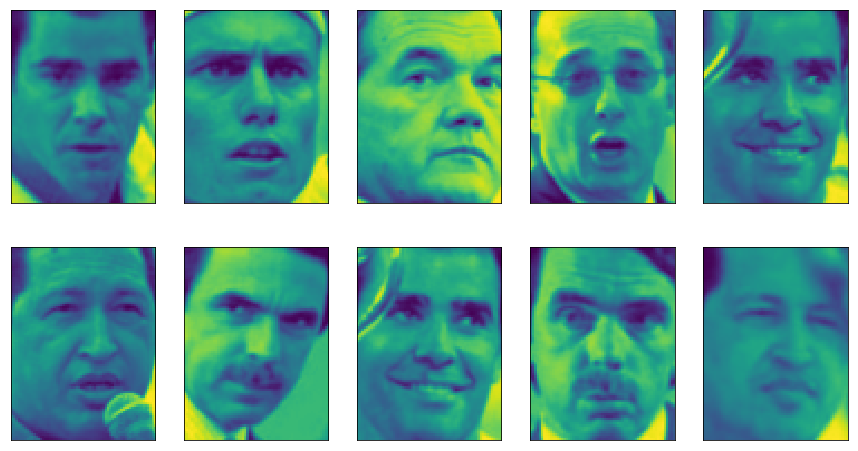

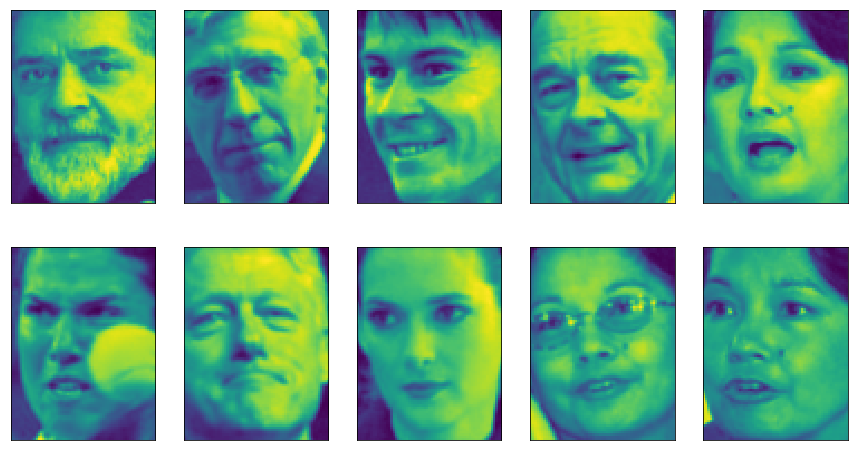

In [25]:
comn=3
inds=np.argsort(X_train_nmf[:,comn])[::-1]
fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
comn=7
inds=np.argsort(X_train_nmf[:,comn])[::-1]
fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for i, (ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

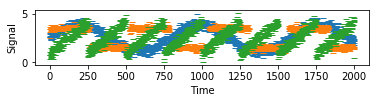

In [26]:
S=mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'_')
plt.xlabel("Time")
plt.ylabel("Signal")

Unfortunately we cannot observe the original signals, but only an additive mixture of all three of them. We want to recover the decomposition of the mixed signal into the original components. We assume that we have many different ways to observe the mixture (say 100 measurement devices), each of which provides us with a series of measurements:


In [27]:
A=np.random.RandomState(0).uniform(size=(100,3))
X=np.dot(S,A.T)
print("Shape of measurement: {}".format(X.shape))

Shape of measurement: (2000, 100)


We can use NMF to recover the three signals

In [31]:
nmf=NMF(n_components=3,random_state=42)
S_=nmf.fit_transform(X)
print("Recover signal shape: {}".format(S_.shape))

Recover signal shape: (2000, 3)


In [32]:
# PCA for comparision
pca=PCA(n_components=3)
H=pca.fit_transform(X)

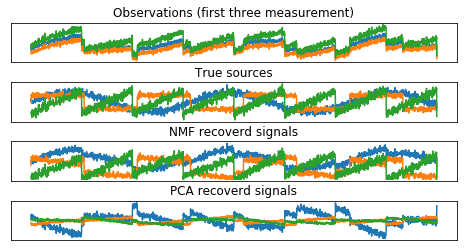

In [36]:
# the following code will show signal activity that was discovered by NMF and PCA
models=[X,S,S_,H]
names=['Observations (first three measurement)','True sources','NMF recoverd signals','PCA recoverd signals']
fig,axes=plt.subplots(4,figsize=(8,4),gridspec_kw={'hspace': .5},subplot_kw={'xticks':(),'yticks':()})

for model,name,ax in zip(models,names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')